# Risk–Return Analysis of Indian Equities Relative to the NIFTY 50


### Project Objective

The objective of this project is to evaluate the long-term performance of selected Indian equities relative to the NIFTY 50 benchmark using return, risk, and downside metrics. The analysis aims to assess not only absolute wealth creation through compounding, but also the quality of returns by examining volatility and maximum drawdowns. This approach supports more informed, risk-aware investment and managerial decision-making.


In [42]:
import sys
!{sys.executable} -m pip install yfinance


Defaulting to user installation because normal site-packages is not writeable


In [43]:
import yfinance as yf
print("yfinance works ✅")


yfinance works ✅


In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [45]:
stocks = [
    "TCS.NS",
    "RELIANCE.NS",
    "HDFCBANK.NS",
    "INFY.NS",
    "ITC.NS",
    "LT.NS"
]

index = ["^NSEI"]


In [46]:
data = yf.download(
    stocks + index,
    start="2010-01-01",
    end="2024-12-31",
    progress=False
)

data.head()


Price            Close                                                 \
Ticker     HDFCBANK.NS     INFY.NS     ITC.NS       LT.NS RELIANCE.NS   
Date                                                                    
2010-01-04   74.944519  222.178497  49.670883  603.804382  218.593094   
2010-01-05   75.010422  222.922668  50.160442  604.875244  217.617493   
2010-01-06   75.060966  219.669815  50.277946  598.181763  221.133698   
2010-01-07   75.256493  214.733185  50.121281  595.308228  224.802307   
2010-01-08   75.355347  209.558395  50.228992  599.074402  224.212891   

Price                                      High                         ...  \
Ticker          TCS.NS        ^NSEI HDFCBANK.NS     INFY.NS     ITC.NS  ...   
Date                                                                    ...   
2010-01-04  262.774445  5232.200195   75.946298  223.658205  49.935246  ...   
2010-01-05  262.844360  5277.899902   75.792512  223.717791  50.277936  ...   
2010-01-06  256.901154  5281.799805   75.572838  228.165418  50.659808  ...   
2010-01-07  249.751999  5263.100098   77.699428  219.967472  50.620635  ...   
2010-01-08  244.647766  5244.750000   75.722223  214.584336  50.620642  ...   

Price             Open                               Volume            \
Ticker     RELIANCE.NS      TCS.NS        ^NSEI HDFCBANK.NS   INFY.NS   
Date                                                                    
2010-01-04  221.763765  263.875662  5200.899902     6100980   4069264   
2010-01-05  233.714740  263.945599  5277.149902    16773200   6895528   
2010-01-06  219.487382  262.844298  5278.149902    13279680   6817288   
2010-01-07  221.133693  257.128484  5281.799805    12247960  10892600   
2010-01-08  225.198642  250.311237  5264.250000    14171800  12649312   

Price                                                     
Ticker        ITC.NS    LT.NS RELIANCE.NS   TCS.NS ^NSEI  
Date                                                      
2010-01-04   5360425  1060024    76646086  1963682   0.0  
2010-01-05  11181903  2683989    21392825  2014488   0.0  
2010-01-06   7819981  3076209    23691760  3349176   0.0  
2010-01-07   5179515  2033021    26197920  6474892   0.0  
2010-01-08   5069346  2940979    15110149  6048178   0.0  

[5 rows x 35 columns]

In [47]:
data.columns


MultiIndex([( 'Close', 'HDFCBANK.NS'),
            ( 'Close',     'INFY.NS'),
            ( 'Close',      'ITC.NS'),
            ( 'Close',       'LT.NS'),
            ( 'Close', 'RELIANCE.NS'),
            ( 'Close',      'TCS.NS'),
            ( 'Close',       '^NSEI'),
            (  'High', 'HDFCBANK.NS'),
            (  'High',     'INFY.NS'),
            (  'High',      'ITC.NS'),
            (  'High',       'LT.NS'),
            (  'High', 'RELIANCE.NS'),
            (  'High',      'TCS.NS'),
            (  'High',       '^NSEI'),
            (   'Low', 'HDFCBANK.NS'),
            (   'Low',     'INFY.NS'),
            (   'Low',      'ITC.NS'),
            (   'Low',       'LT.NS'),
            (   'Low', 'RELIANCE.NS'),
            (   'Low',      'TCS.NS'),
            (   'Low',       '^NSEI'),
            (  'Open', 'HDFCBANK.NS'),
            (  'Open',     'INFY.NS'),
            (  'Open',      'ITC.NS'),
            (  'Open',       'LT.NS'),
            (  'Open', 'R

In [48]:
price_data = data.xs("Close", axis=1, level=0)
price_data.head()


Ticker,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS,^NSEI
Date,,,,,,,
2010-01-04,74.944519,222.178497,49.670883,603.804382,218.593094,262.774445,5232.200195
2010-01-05,75.010422,222.922668,50.160442,604.875244,217.617493,262.844360,5277.899902
2010-01-06,75.060966,219.669815,50.277946,598.181763,221.133698,256.901154,5281.799805
2010-01-07,75.256493,214.733185,50.121281,595.308228,224.802307,249.751999,5263.100098
2010-01-08,75.355347,209.558395,50.228992,599.074402,224.212891,244.647766,5244.750000


In [49]:
price_data.to_csv("data/price_data.csv")
print("CSV saved successfully 📁")


CSV saved successfully 📁


If I invested ₹100 in each stock on the first date, what would it be worth over time?

In [50]:
normalized = price_data / price_data.iloc[0] * 100
normalized.head()


Ticker,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS,^NSEI
Date,,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.087935,100.334943,100.985606,100.177352,99.553691,100.026607,100.873432
2010-01-06,100.155378,98.870871,101.222171,99.068801,101.162252,97.764893,100.947968
2010-01-07,100.416273,96.648950,100.906764,98.592896,102.840535,95.044250,100.590572
2010-01-08,100.548176,94.319836,101.123615,99.216637,102.570894,93.101811,100.239857


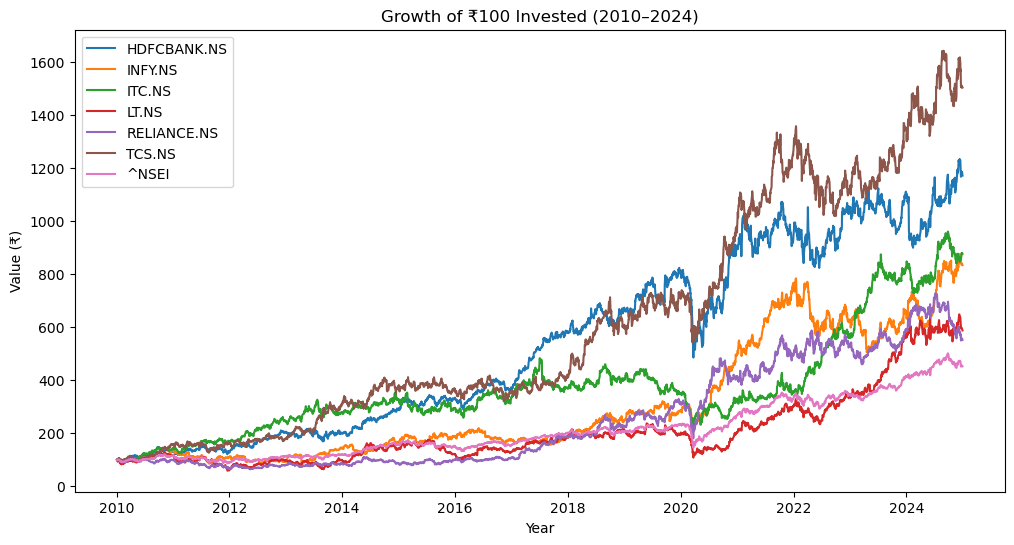

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for col in normalized.columns:
    plt.plot(normalized.index, normalized[col], label=col)

plt.title("Growth of ₹100 Invested (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Value (₹)")
plt.legend()
plt.show()


Compound Annual Growth Rate (CAGR)

CAGR (Compound Annual Growth Rate) represents the average annual growth rate of an investment over a specified time period, assuming profits are reinvested and growth occurs at a constant rate.

Unlike absolute returns, CAGR accounts for the effect of compounding, making it a reliable metric for comparing long-term investment performance across different assets.

🔍 Why CAGR is Important

Normalizes growth across different time periods

Allows fair comparison between stocks and market indices

Reflects long-term wealth creation rather than short-term price movements

🧮 Formula Used
CAGR
=
(
Final Price
Initial Price
)
1
Number of Years
−
1
CAGR=(
Initial Price
Final Price
	​

)
Number of Years
1
	​

−1
📊 Methodology

Extract closing prices for each stock at the start and end of the analysis period

Compute the exact investment duration in years

Apply the CAGR formula to calculate annualized returns

Rank stocks based on CAGR to identify superior long-term performers

⚠️ Limitations

CAGR does not capture interim volatility or drawdowns

Two investments with identical CAGR may have very different risk profiles

Therefore, CAGR should be interpreted alongside risk metrics such as volatility and maximum drawdown.

🧠 Interpretation Objective

The objective of this analysis is to identify stocks that demonstrate consistent long-term compounding and to evaluate whether selected stocks outperform the NIFTY 50 benchmark on a risk-adjusted basis.

In [52]:
years = (price_data.index[-1] - price_data.index[0]).days / 365.25

cagr = (price_data.iloc[-1] / price_data.iloc[0]) ** (1 / years) - 1
cagr = cagr.sort_values(ascending=False)

cagr


Ticker
TCS.NS         0.198162
HDFCBANK.NS    0.178371
ITC.NS         0.155772
INFY.NS        0.151959
LT.NS          0.125381
RELIANCE.NS    0.120695
^NSEI          0.105880
dtype: float64

Over the 2010–2024 period, TCS and HDFC Bank delivered significantly higher CAGR compared to the NIFTY 50 benchmark, indicating superior long-term compounding among the selected stocks.

📉 Volatility (Risk Measurement)

Volatility measures the degree of variation in an asset’s returns over time and is commonly used as a proxy for investment risk. Higher volatility indicates larger price fluctuations and potentially higher emotional and financial stress for investors.

In this analysis, annualized volatility is calculated using daily returns to assess and compare the risk profiles of selected stocks relative to the NIFTY 50 benchmark.

In [53]:
daily_returns = price_data.pct_change().dropna()
volatility = daily_returns.std() * np.sqrt(252)

volatility = volatility.sort_values()
volatility


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15116\4266978108.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = price_data.pct_change().dropna()


Ticker
^NSEI          0.167326
HDFCBANK.NS    0.232831
ITC.NS         0.245358
TCS.NS         0.247993
INFY.NS        0.271366
RELIANCE.NS    0.274032
LT.NS          0.284801
dtype: float64

While TCS delivered the highest CAGR among the selected stocks, HDFC Bank demonstrated a more favorable risk–return profile, achieving strong long-term compounding with comparatively lower volatility

### 📉 Maximum Drawdown

Maximum drawdown measures the largest peak-to-trough decline in an asset’s price during the analysis period. It represents the worst possible loss an investor could have experienced if they bought at a peak and sold at the bottom.

This metric helps assess downside risk and investor pain tolerance beyond average volatility.

In [54]:
cum_returns = (1 + daily_returns).cumprod()
rolling_max = cum_returns.cummax()
drawdown = (cum_returns - rolling_max) / rolling_max

max_drawdown = drawdown.min().sort_values()
max_drawdown


Ticker
ITC.NS        -0.552811
LT.NS         -0.545987
RELIANCE.NS   -0.450884
HDFCBANK.NS   -0.410550
^NSEI         -0.384399
INFY.NS       -0.373627
TCS.NS        -0.272113
dtype: float64

📌 Integrated Risk–Return Interpretation

This analysis evaluates selected Indian equities using three complementary dimensions:

Return (CAGR)

Risk (Annualized Volatility)

Downside Exposure (Maximum Drawdown)

By jointly analyzing these metrics, the objective is to assess not only how much returns were generated, but also the quality and sustainability of those returns.

🔍 Key Observations

TCS demonstrated the strongest overall performance, delivering the highest long-term compounding while also exhibiting the lowest maximum drawdown among the selected stocks. This indicates superior capital preservation alongside high returns.

HDFC Bank also achieved strong long-term returns with relatively moderate volatility; however, it experienced deeper drawdowns during periods of market stress, highlighting higher downside exposure compared to TCS.

ITC, despite reasonable CAGR, exhibited the largest maximum drawdown, suggesting that headline returns alone can be misleading without considering downside risk.

The NIFTY 50 benchmark displayed lower volatility and moderate drawdowns, reflecting the stabilizing effect of diversification, albeit at the cost of lower long-term returns.

🧠 Managerial Insight

The results indicate that high-quality businesses can generate superior long-term returns while simultaneously limiting downside risk. Metrics such as volatility and drawdown are therefore essential complements to CAGR when evaluating investment performance or making strategic capital allocation decisions.

⚠️ Interpretation Note

This analysis is based solely on historical price data and does not incorporate valuation metrics, macroeconomic variables, or company fundamentals. Past performance should not be interpreted as a guarantee of future returns.

### ⚖️ Risk-Adjusted Return (Sharpe-like Ratio)

Risk-adjusted return evaluates how efficiently an asset generates returns relative to the risk taken. Instead of looking at absolute returns alone, this metric helps identify investments that deliver superior performance per unit of volatility.

In this analysis, a simplified Sharpe-like ratio is calculated by dividing CAGR by annualized volatility for comparative purposes.


In [55]:
risk_adjusted = cagr / volatility
risk_adjusted = risk_adjusted.sort_values(ascending=False)

risk_adjusted


Ticker
TCS.NS         0.799063
HDFCBANK.NS    0.766100
ITC.NS         0.634876
^NSEI          0.632777
INFY.NS        0.559976
RELIANCE.NS    0.440442
LT.NS          0.440242
dtype: float64

### 📌 Final Insight

When return, volatility, and drawdown are evaluated together, TCS emerges as the most efficient long-term performer among the selected stocks, delivering superior compounding with comparatively lower downside risk. HDFC Bank also demonstrates a strong risk-adjusted profile, while other stocks exhibit higher volatility or deeper drawdowns without proportional return enhancement.


In [56]:
plt.savefig("growth_chart.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>